#Question No.1.  Vision Dataset:Analytics




###DL Group 196:
###S Alagu Thiruvadi Nainar -- 2019AH04028
###Ashutosh More -- 2019AH04080
###Avinash Menon -- 2019AH04057

In [1]:
!nvidia-smi

Sun May 23 15:56:02 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

In [3]:
import pathlib
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-160.tgz"
data_dir = keras.utils.get_file('imagenette2-160', origin=dataset_url, untar=True)
data_dir_train = keras.utils.get_file('imagenette2-160/train', origin=dataset_url, untar=True)
data_dir_val = keras.utils.get_file('imagenette2-160/val', origin=dataset_url, untar=True)

99008512/99003388 [==============================] - 1s 0us/step


In [4]:
img_height = 160
img_width = 160
batch = 64

train_ds = keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch)

val_ds = keras.preprocessing.image_dataset_from_directory(
  data_dir_val,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch)

class_names = val_ds.class_names
print(class_names)

   

Found 9469 files belonging to 10 classes.
Found 3925 files belonging to 10 classes.
['n01440764', 'n02102040', 'n02979186', 'n03000684', 'n03028079', 'n03394916', 'n03417042', 'n03425413', 'n03445777', 'n03888257']


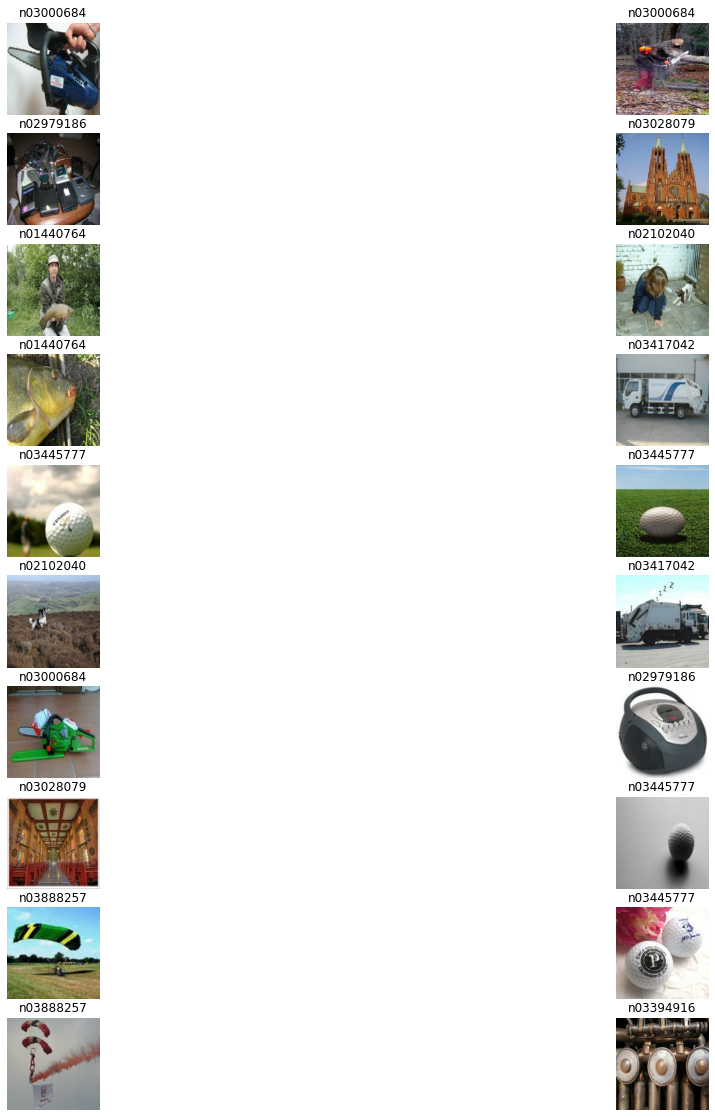

In [5]:
plt.figure(figsize=(20, 20))
for images, labels in train_ds.take(1):
  for i in range(20):
    ax = plt.subplot(10, 2, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

**Image Data Augmentation:-** *RandomRotation*

In [6]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

**Visualizing Augmented Data**

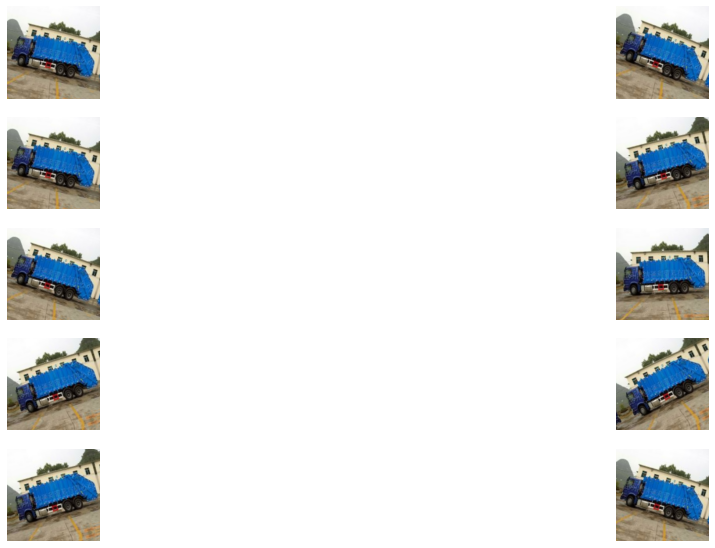

In [7]:
plt.figure(figsize=(20, 20))
for images, _ in train_ds.take(1):
    for i in range(10):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(10, 2, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Image Data Augmentation:-** *Height Shift*



In [8]:
data_augmentation = keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomHeight(factor=(0.2, 0.3) , interpolation="bilinear", seed=None),
    ]
)

**Visualizing Augmented Data**

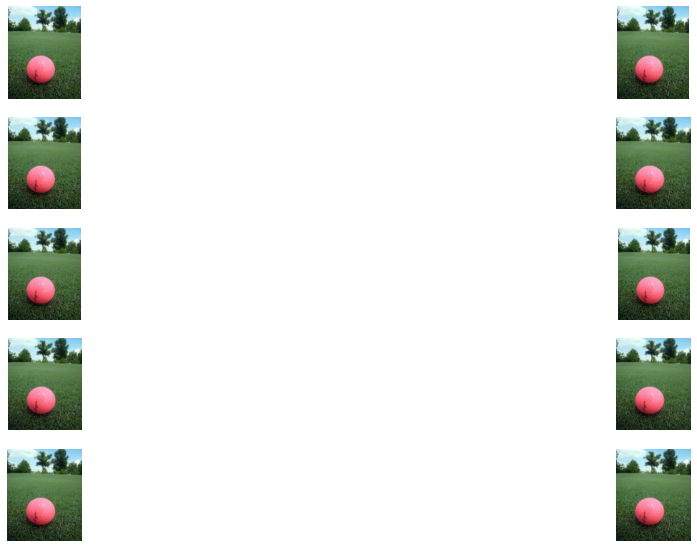

In [9]:
plt.figure(figsize=(20, 20))
for images, _ in train_ds.take(1):
    for i in range(10):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(10, 2, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [10]:
# Normalize the data
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
train_ds = train_ds.map(lambda x,y: (normalization_layer(x), y)) 
val_ds = val_ds.map(lambda x,y: (normalization_layer(x), y))

image_batch, labels_batch = next(iter(train_ds))
print(image_batch.shape)
print(labels_batch.shape)

(64, 160, 160, 3)
(64,)


In [11]:
model = models.Sequential([
    layers.Flatten(input_shape=(img_height,img_width,3)),
    layers.Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.Dense(32, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.Dense(16, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

history = model.fit(train_ds,
  validation_data=val_ds,
  epochs=20)



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 76800)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                4915264   
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

Final training loss 	 2.0485217571258545
Final training accuracy  0.29823634028434753
Model Accuracy


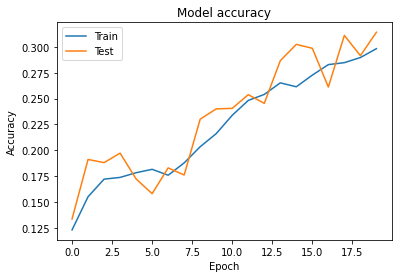

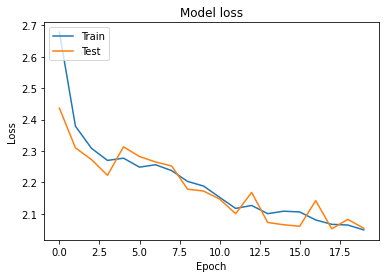

62/62 [==============================] - 4s 61ms/step - loss: 2.0537 - accuracy: 0.3141
Accuracy 0.3141401410102844


In [12]:
#Printing Model Metrics

print('Final training loss \t', history.history['loss'][-1])
print('Final training accuracy ', history.history['accuracy'][-1])

# Plot training & validation accuracy values
print('Model Accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot validation and training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

loss, acc = model.evaluate(val_ds)
print("Accuracy", acc)

**Hyperparameter Tuning** *Network Depth*

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 76800)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4915264   
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                90        
Total params: 4,917,698
Trainable params: 4,917,698
Non-trainable params: 0
____________________________________________

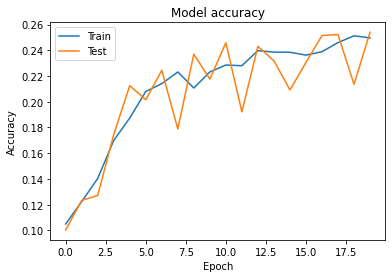

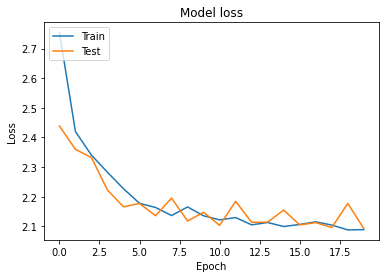

62/62 [==============================] - 4s 54ms/step - loss: 2.0932 - accuracy: 0.2540
Accuracy 0.25401273369789124


In [13]:
#Changing the number of hidden layers and hidden units
model_depth = models.Sequential([
    layers.Flatten(input_shape=(img_height,img_width,3)),
    layers.Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.Dense(32, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.Dropout(0.2),
    layers.Dense(8, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.Dense(10)
])

model_depth.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_depth.summary()

history = model_depth.fit(train_ds,
  validation_data=val_ds,
  epochs=20)



#Printing Model Metrics

print('Final training loss \t', history.history['loss'][-1])
print('Final training accuracy ', history.history['accuracy'][-1])

# Plot training & validation accuracy values
print('Model Accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot validation and training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

loss, acc = model_depth.evaluate(val_ds)
print("Accuracy", acc)


**Hyperparameter Tuning** *Regularization*

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 76800)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4915264   
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_12 (Dense)             (None, 20)                340       
Total params: 4,918,212
Trainable params: 4,918,212
Non-trainable params: 0
____________________________________________

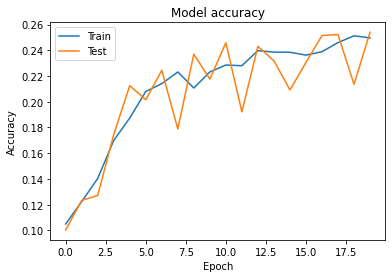

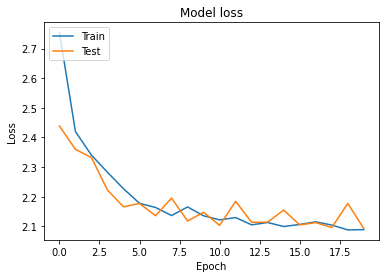

62/62 [==============================] - 4s 54ms/step - loss: 1.9529 - accuracy: 0.3208
Accuracy 0.32076433300971985


In [14]:
#Model_without_regularization
model_reg = models.Sequential([
    layers.Flatten(input_shape=(img_height,img_width,3)),
    layers.Dense(64, activation='relu',),
    layers.Dense(32, activation='relu',),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu',),
    layers.Dense(20)
])

model_reg.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_reg.summary()

model_reg.fit(train_ds,
  validation_data=val_ds,
  epochs=20)


#Printing Model Metrics

print('Final training loss \t', history.history['loss'][-1])
print('Final training accuracy ', history.history['accuracy'][-1])

# Plot training & validation accuracy values
print('Model Accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot validation and training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

loss, acc = model_reg.evaluate(val_ds)
print("Accuracy", acc)


**Comparing the Models**

Model :- Train Accuracy- 29.8% , Val Accuracy- 31.41%

Model(change of hidden layer):- Train Accuracy- 24% , Val Accuracy- 25%
   
Model(remove regularization):- Train Accuracy-24.9%  , Val Accuracy- 32%